In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sequential_sampler import SMCSampler1, SMCSampler2

import torch
from torch.distributions import MultivariateNormal

In [10]:
N = 50000
x0 = torch.randn(N,1)
w0 = torch.ones(N)/N
T = 10
target_log_densities = [MultivariateNormal(torch.tensor([float(i)]), torch.eye(1)).log_prob for i in range(T)]
smc = SMCSampler2(target_log_densities, x0, w0)
smc.sample()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.11s/it]


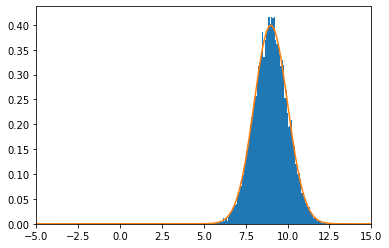

In [11]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
linspace= torch.linspace(-5, 15,1000).unsqueeze(-1)
for i,particle_set in enumerate(smc.particles):
    clear_output(wait=True)
    plt.figure()
    plt.hist(particle_set.detach().numpy(), bins= 100, density = True,weights = smc.weights[i].detach().numpy())
    plt.plot(linspace, torch.exp(target_log_densities[i](linspace)))
    plt.xlim((-5,15))
    plt.show()

In [12]:
from targets.variational_inference_target import * 

In [13]:
T = 20
target = Dimension1()

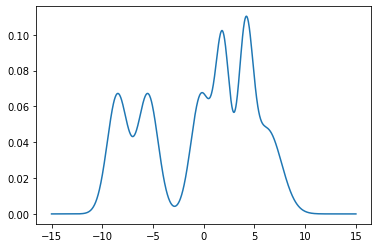

In [14]:
def interpolation(t, target_log_density):
    return lambda samples : (1-t/(T-1))*MultivariateNormal(torch.zeros(1), torch.eye(1)).log_prob(samples) + t/(T-1)*target.log_prob(samples)
target_log_densities = [interpolation(t, target.log_prob) for t in range(T)]

from IPython.display import clear_output
import matplotlib.pyplot as plt
linspace= torch.linspace(-15, 15,1000).unsqueeze(-1)
for i in range(T):
    clear_output(wait=True)
    plt.figure()
    plt.plot(linspace, torch.exp(target_log_densities[i](linspace)))
    plt.show()

In [15]:
smc = SMCSampler2(target_log_densities, x0, w0)
smc.sample()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [01:23<00:00,  4.38s/it]


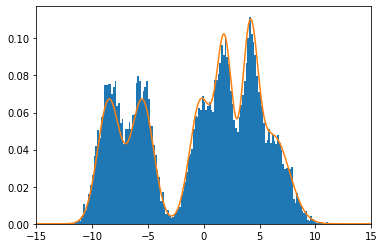

In [16]:
for i,particle_set in enumerate(smc.particles):
    clear_output(wait=True)
    plt.figure()
    temp = particle_set.squeeze(-1).detach().numpy()
    plt.hist(particle_set.squeeze(-1).detach().numpy(), bins= 150, density = True, weights = smc.weights[i].detach().numpy())
    linspace= torch.linspace(-15, 15,1000).unsqueeze(-1)
    plt.plot(linspace, torch.exp(target_log_densities[i](linspace)))
    plt.xlim((-15,15))
    plt.show()